# Fire resistance classification

## Library loading, settings and dataset load

Hide warnings

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Main libraries load

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import time

Additional libraries

In [3]:
from feature_selector import FeatureSelector as feat_selec
from autofeatselect import FeatureSelector
from autofeatselect import AutoFeatureSelect
from sklearn.utils import resample

Load Compression resistance dataset

In [4]:
path = '/Users/manolo/Documents/Docencia/Tesis Doctorales/Elena Albeira Guirado Lucinio/Resistencia fuego/Datasets/'

In [5]:
df = pd.read_excel(path+'CR original.xlsx')

In [6]:
df.head()

,Rc,Water/solid ratio,Density,Gypsum,Vermiculite,Fiberglass,PP Fiber,Coal Fly Ash,Size(mm),Incineration ash,...,Rice husk ash,Cardoon ash,Poplar ash,MSW ash,Cl2Mg,MgSO4,AlOH3,Metallurgical slag,Coal slag,Construction waste
0,1.320439,0.4,1309.000000,20.0,NaN,NaN,NaN,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.320439,0.4,1371.000000,20.0,NaN,NaN,NaN,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.700407,0.4,849.841788,20.0,NaN,NaN,NaN,80.0,>125 micras,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.953013,0.4,1042.269832,20.0,NaN,NaN,NaN,80.0,>100 micras,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.998941,0.4,1050.458259,20.0,NaN,NaN,NaN,80.0,> 65 micras,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset variable info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rc                  103 non-null    float64
 1   Water/solid ratio   103 non-null    float64
 2   Density             101 non-null    float64
 3   Gypsum              67 non-null     float64
 4   Vermiculite         15 non-null     float64
 5   Fiberglass          11 non-null     float64
 6   PP Fiber            3 non-null      float64
 7   Coal Fly Ash        38 non-null     float64
 8   Size(mm)            25 non-null     object 
 9   Incineration ash    4 non-null      float64
 10  APC waste           1 non-null      float64
 11  Portland concrete   36 non-null     float64
 12  Ladle slag          4 non-null      float64
 13  Orujillo slag       5 non-null      float64
 14  Orujillo ash        17 non-null     float64
 15  Rice husk ash       1 non-null      float64
 16  Cardoon 

Drop de size(mm)

In [8]:
df.drop(columns=['Size(mm)'], inplace=True)

Filling NaN with 0

In [9]:
df.fillna(value = 0, inplace = True)

In [10]:
df.head()

,Rc,Water/solid ratio,Density,Gypsum,Vermiculite,Fiberglass,PP Fiber,Coal Fly Ash,Incineration ash,APC waste,...,Rice husk ash,Cardoon ash,Poplar ash,MSW ash,Cl2Mg,MgSO4,AlOH3,Metallurgical slag,Coal slag,Construction waste
0,1.320439,0.4,1309.000000,20.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.320439,0.4,1371.000000,20.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.700407,0.4,849.841788,20.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.953013,0.4,1042.269832,20.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.998941,0.4,1050.458259,20.0,0.0,0.0,0.0,80.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


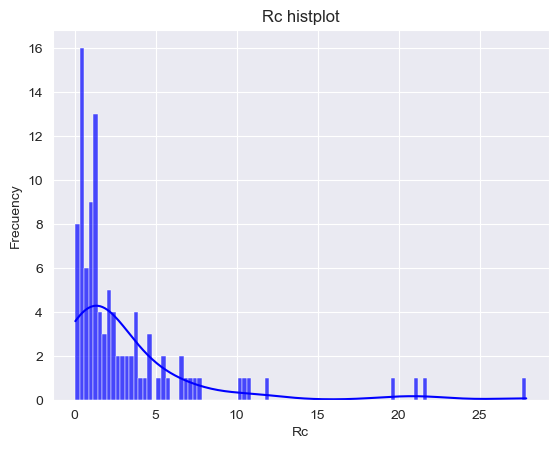

In [11]:
sns.histplot(data=df, x='Rc', bins=100, kde=True, color='blue', alpha=0.7)

plt.title('Rc histplot')
plt.xlabel('Rc')
plt.ylabel('Frecuency')

plt.show()

Changing to classification

In [12]:
def assign_rc(value):
    if value < 1:
        return '0 - 1 MPa'
    if 1 <= value < 5:
        return '1 - 5 MPa'
    elif 5 <= value <= 10:
        return '5 - 10 MPa'
    elif value > 10:
        return '> 10 MPa'
    else:
        return None

In [13]:
df['CR'] = df['Rc'].apply(assign_rc)

In [14]:
df.tail()

,Rc,Water/solid ratio,Density,Gypsum,Vermiculite,Fiberglass,PP Fiber,Coal Fly Ash,Incineration ash,APC waste,...,Cardoon ash,Poplar ash,MSW ash,Cl2Mg,MgSO4,AlOH3,Metallurgical slag,Coal slag,Construction waste,CR
98,12.0,0.775,2408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,> 10 MPa
99,1.9,0.845,970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,1 - 5 MPa
100,3.6,1.050,1120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,1 - 5 MPa
101,6.8,1.550,1455.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,5 - 10 MPa
102,2.9,0.500,886.9,0.0,9.5,0.5,0.0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1 - 5 MPa


Checking class distribution

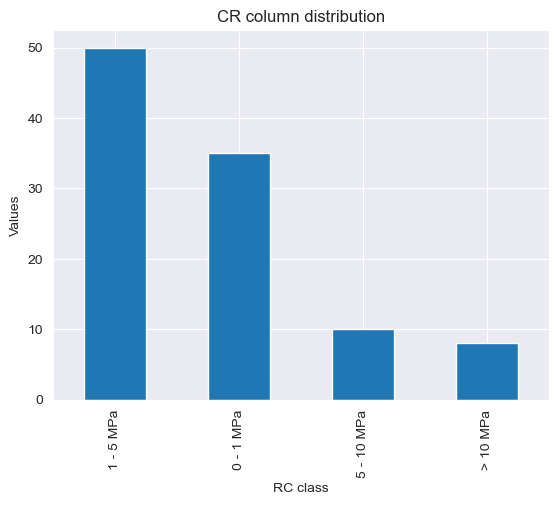

In [15]:
rc_counts = df['CR'].value_counts()

rc_counts.plot(kind='bar')

plt.title('CR column distribution')
plt.xlabel('RC class')
plt.ylabel('Values')

plt.show()

Oversampling

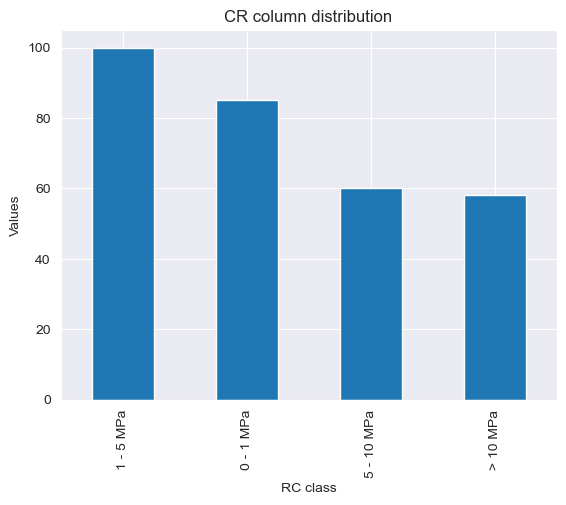

In [16]:
rc_counts = df['CR'].value_counts()

max_count = rc_counts.max()

dfs = [df]
for category in rc_counts.index:
    df_category = df[df['CR'] == category]
    df_category_upsampled = resample(df_category, 
                                     replace=True,    # Sobremuestreo con reemplazo
                                     n_samples=max_count,  # Número de ejemplos en la categoría más frecuente
                                     random_state=42)  # Para reproducibilidad
    dfs.append(df_category_upsampled)

df_balanced = pd.concat(dfs)

rf_balanced_counts = df_balanced['CR'].value_counts()

rf_balanced_counts.plot(kind='bar')

plt.title('CR column distribution')
plt.xlabel('RC class')
plt.ylabel('Values')

plt.show()

## Features and target split

In [17]:
cat_feat = []
bin_feat = []
target = 'CR'
exc = 'Rc'
exclude = cat_feat + bin_feat + [target] + [exc]
num_feat = [col for col in df_balanced.columns if col not in exclude]

In [18]:
df_fs = df_balanced.drop(columns = target)
df_fs = df_fs.drop(columns = exc)
df_target = df_balanced[target]

In [19]:
df_fs.reset_index(drop = True, inplace = True)
df_target.reset_index(drop = True, inplace = True)

In [20]:
fs = feat_selec(data = df_fs , labels = df_target)

In [21]:
fs.identify_missing(missing_threshold=0)

0 features with greater than 0.00 missing values.



In [22]:
fs.identify_single_unique()

0 features with a single unique value.



In [23]:
single_unique = fs.ops['single_unique']
single_unique

[]

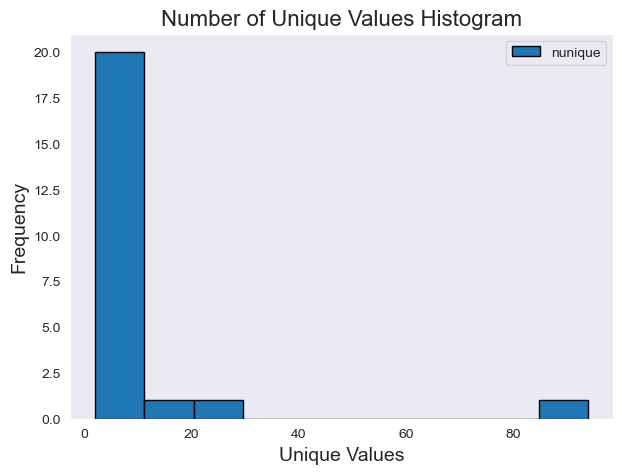

In [24]:
fs.plot_unique()

In [25]:
fs.unique_stats.sample(10)

,nunique
Portland concrete,10
Orujillo ash,8
Vermiculite,4
Incineration ash,3
Fiberglass,4
Water/solid ratio,26
Density,94
MSW ash,2
Construction waste,2
Cl2Mg,3


In [26]:
fs.identify_collinear(correlation_threshold=0.9, one_hot = False)

0 features with a correlation magnitude greater than 0.90.



In [27]:
correlated_features = fs.ops['collinear']

In [28]:
correlated_features

[]

In [29]:
fs.record_collinear

,drop_feature,corr_feature,corr_value


In [30]:
#df_fs = fs.remove(methods = ['collinear'], keep_one_hot = False)

In [31]:
df_fs.shape

(303, 23)

In [32]:
df_fs.head()

,Water/solid ratio,Density,Gypsum,Vermiculite,Fiberglass,PP Fiber,Coal Fly Ash,Incineration ash,APC waste,Portland concrete,...,Rice husk ash,Cardoon ash,Poplar ash,MSW ash,Cl2Mg,MgSO4,AlOH3,Metallurgical slag,Coal slag,Construction waste
0,0.4,1309.000000,20.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.4,1371.000000,20.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.4,849.841788,20.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,1042.269832,20.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,1050.458259,20.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_target = df_target.astype('category')

In [34]:
df_target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: CR
Non-Null Count  Dtype   
--------------  -----   
303 non-null    category
dtypes: category(1)
memory usage: 635.0 bytes


In [35]:
map_dict = {'0 - 1 MPa': 0, '1 - 5 MPa': 1, '5 - 10 MPa': 2, '> 10 MPa': 3}

In [36]:
df_target = df_target.map(map_dict)

In [37]:
df_target.head()

0    1
1    1
2    0
3    0
4    0
Name: CR, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [38]:
feat_selector = FeatureSelector(modeling_type='classification',
                                X_train=df_fs,
                                y_train=df_target,
                                X_test=None,
                                y_test=None,
                                numeric_columns=num_feat,
                                categorical_columns=bin_feat,
                                seed=24)

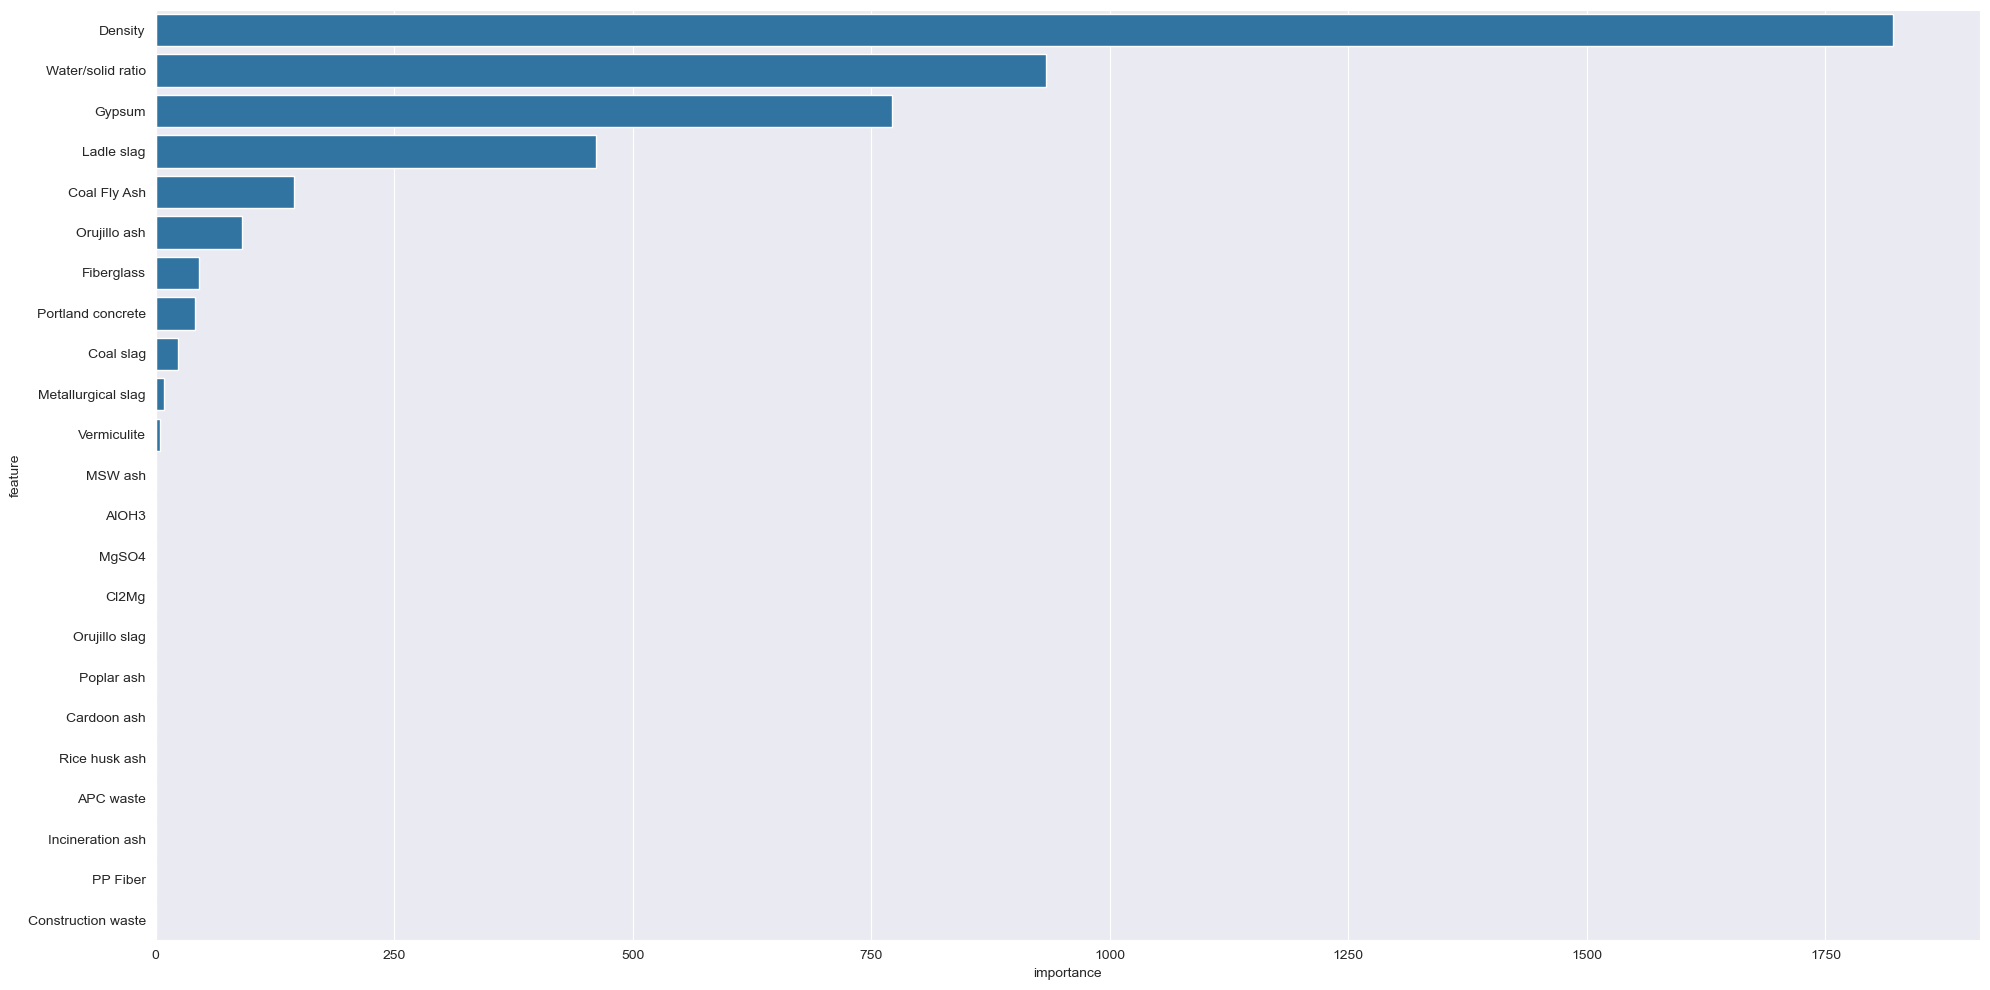

In [39]:
lgbm_importance_df = feat_selector.lgbm_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)

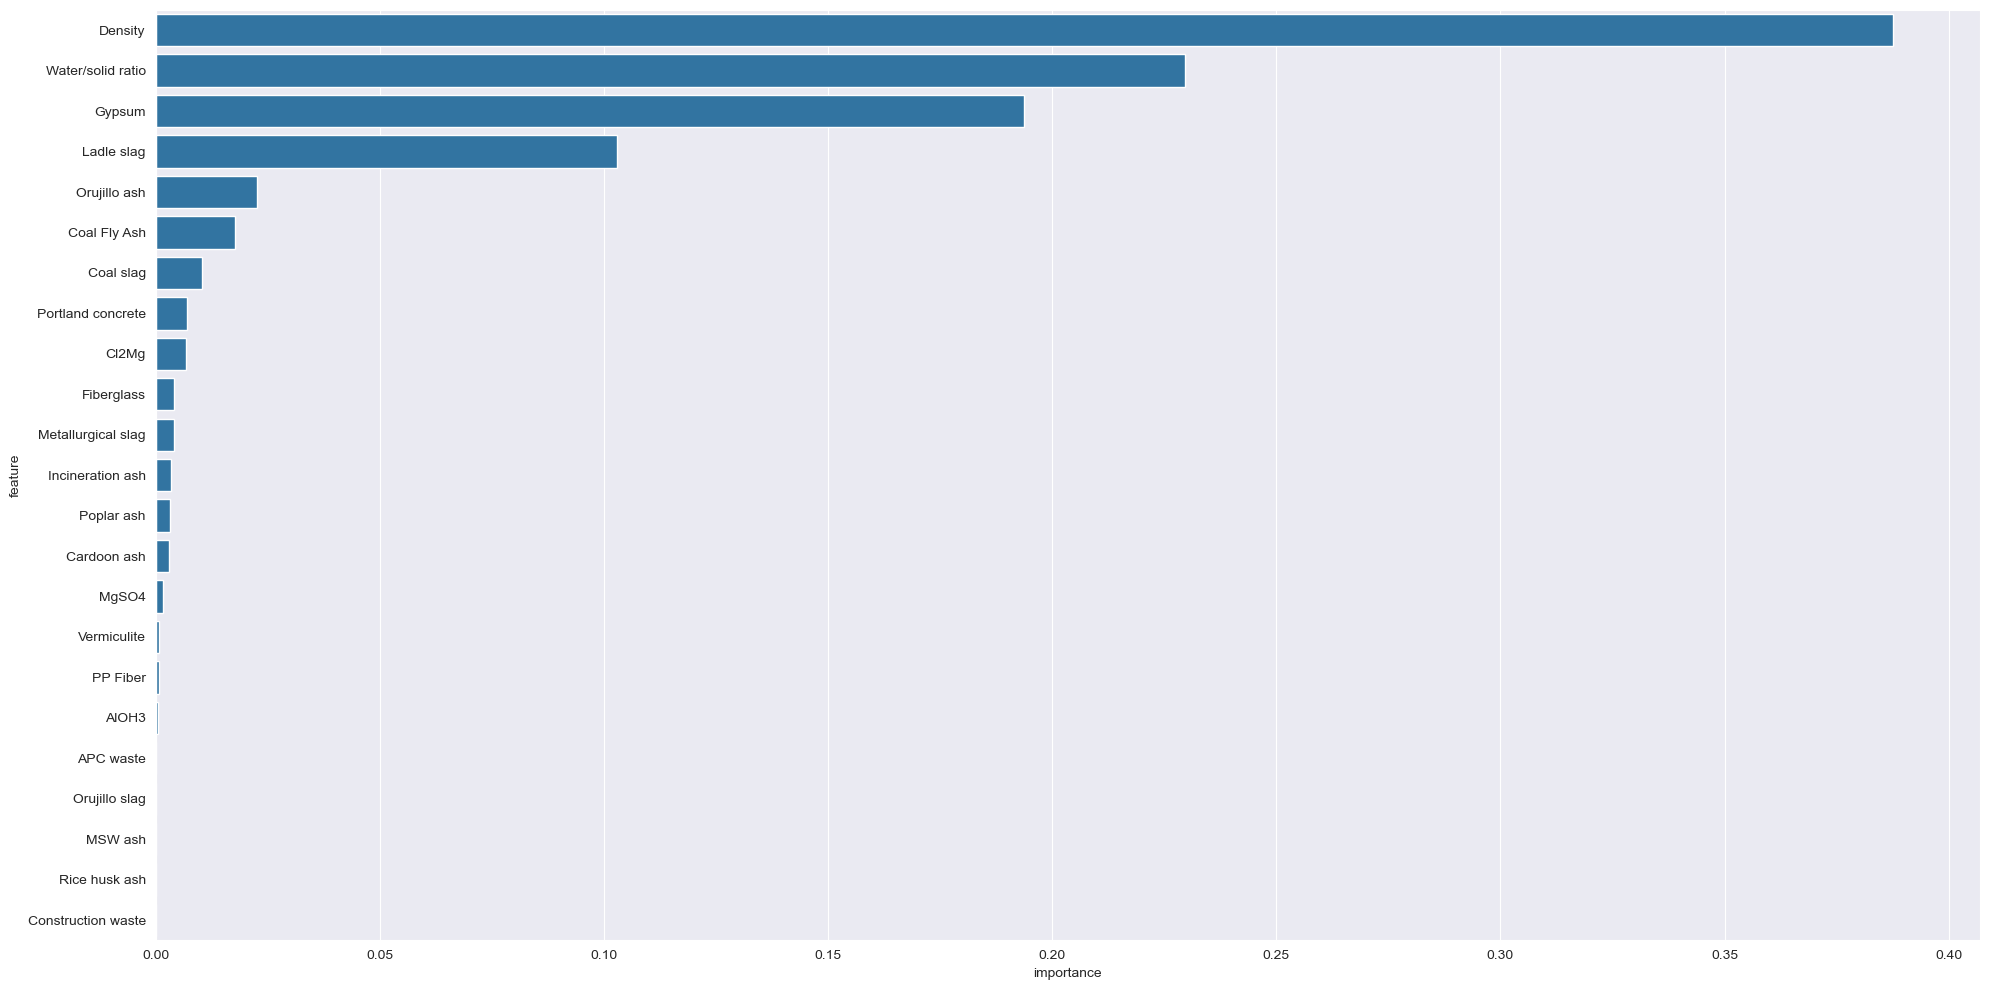

In [40]:
#Train LightGBM model & return importance results as pd.DataFrame 
xgb_importance_df = feat_selector.xgb_importance(hyperparam_dict=None,
                                                   objective=None,
                                                   return_plot=True)


#Apply RFECV with using LightGBM as the estimator & return importance results as pd.DataFrame 
xgb_hyperparams = {'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 400,
                    'num_leaves': 30, 'random_state':24, 'importance_type':'gain'
                   }


In [41]:
#Automated correlation analysis & applying multiple feature selection methods
feat_selector = AutoFeatureSelect(modeling_type='classification',
                                X_train=df_fs,
                                y_train=df_target,
                                X_test=None,
                                y_test=None,
                                numeric_columns=num_feat,
                                categorical_columns=bin_feat,
                                seed=24)

corr_features = feat_selector.calculate_correlated_features(static_features=None,
                                                            num_threshold=0.99,
                                                            cat_threshold=0.99)

feat_selector.drop_correlated_features()

final_importance_df = feat_selector.apply_feature_selection(selection_methods=['xgb'])

XGBoost Feature Importance is finished


In [42]:
final_importance_df

,feature,xgb_importance
0,Density,0.387612
1,Water/solid ratio,0.229629
2,Gypsum,0.193789
3,Ladle slag,0.102852
4,Orujillo ash,0.022717
5,Coal Fly Ash,0.017784
6,Coal slag,0.010392
7,Portland concrete,0.006954
8,Cl2Mg,0.006800
9,Fiberglass,0.004132


In [43]:
def get_feature_lists_by_threshold(df, threshold=0.99):
    accumulated_sum = 0
    include = []
    exclude = []
    
    for index, row in df.iterrows():
        if accumulated_sum + row['xgb_importance'] <= threshold:
            include.append(row['feature'])
            accumulated_sum += row['xgb_importance']
        else:
            exclude.append(row['feature'])
            exclude.extend(df['feature'][index + 1:])
            break
    
    return include, exclude

In [44]:
threshold = 0.99

include, exclude = get_feature_lists_by_threshold(final_importance_df, threshold)

print("Include:", include)
print("Exclude:", exclude)

Include: ['Density', 'Water/solid ratio', 'Gypsum', 'Ladle slag', 'Orujillo ash', 'Coal Fly Ash', 'Coal slag', 'Portland concrete', 'Cl2Mg', 'Fiberglass', 'Metallurgical slag']
Exclude: ['Incineration ash', 'Poplar ash', 'Cardoon ash', 'MgSO4', 'Vermiculite', 'PP Fiber', 'AlOH3', 'APC waste', 'Orujillo slag', 'MSW ash', 'Rice husk ash', 'Construction waste']


In [45]:
df_balanced = df_balanced.drop(columns = exclude)

In [46]:
df_balanced.head()

,Rc,Water/solid ratio,Density,Gypsum,Fiberglass,Coal Fly Ash,Portland concrete,Ladle slag,Orujillo ash,Cl2Mg,Metallurgical slag,Coal slag,CR
0,1.320439,0.4,1309.000000,20.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1 - 5 MPa
1,1.320439,0.4,1371.000000,20.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1 - 5 MPa
2,0.700407,0.4,849.841788,20.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0 - 1 MPa
3,0.953013,0.4,1042.269832,20.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0 - 1 MPa
4,0.998941,0.4,1050.458259,20.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0 - 1 MPa


In [47]:
drop = ['Rc']

In [48]:
df_balanced = df_balanced.drop(columns = drop)

In [49]:
df_balanced.head()

,Water/solid ratio,Density,Gypsum,Fiberglass,Coal Fly Ash,Portland concrete,Ladle slag,Orujillo ash,Cl2Mg,Metallurgical slag,Coal slag,CR
0,0.4,1309.000000,20.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1 - 5 MPa
1,0.4,1371.000000,20.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,1 - 5 MPa
2,0.4,849.841788,20.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0 - 1 MPa
3,0.4,1042.269832,20.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0 - 1 MPa
4,0.4,1050.458259,20.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0 - 1 MPa


In [50]:
df_balanced.to_excel(path + 'CR_FS_class.xlsx', index=False)